In [176]:
import itertools
from sklearn.decomposition import PCA
import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)



In [177]:
df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [178]:
model_df = df.copy()

In [179]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns



In [180]:
model_df, cat_cols = one_hot_encoder(model_df, nan_as_category= False)

In [181]:
model_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [182]:
model_df = model_df[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]]
model_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [183]:
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.02,0.00,0.39,1.00
1,0.06,0.00,0.82,1.00
2,0.04,0.01,0.05,0.00
3,0.10,0.01,0.78,0.00
4,0.25,0.02,0.40,0.00


In [184]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(model_df)
kmeans.get_params()

kmeans.n_clusters, kmeans.cluster_centers_, kmeans.labels_, kmeans.inertia_

(4,
 array([[ 2.00742240e-01,  3.66120219e-01,  6.80451128e-01,
         -3.33066907e-16],
        [ 6.04567308e-01,  3.88661202e-01,  2.87840136e-01,
          1.00000000e+00],
        [ 5.79020979e-01,  3.59165425e-01,  3.44712430e-01,
         -2.77555756e-16],
        [ 1.97115385e-01,  3.85245902e-01,  7.21173469e-01,
          1.00000000e+00]]),
 array([3, 3, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 3, 2, 3, 1, 0, 1, 3,
        2, 3, 2, 3, 2, 3, 2, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 0, 2, 3, 1, 0,
        2, 0, 2, 0, 0, 0, 2, 3, 0, 1, 2, 1, 2, 1, 0, 1, 1, 3, 2, 2, 1, 3,
        2, 2, 3, 0, 1, 2, 2, 2, 1, 3, 2, 1, 0, 2, 1, 3, 1, 2, 0, 1, 2, 0,
        0, 2, 2, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 2, 1, 3, 1, 0, 2, 1, 1, 1,
        1, 0, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 0, 3, 0, 0, 1, 3, 1, 3, 1, 3,
        0, 0, 1, 0, 2, 3, 1, 0, 2, 3, 0, 0, 1, 3, 1, 0, 2, 3, 1, 3, 2, 0,
        2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 2, 0,
        1, 3, 1, 3, 2, 0, 1, 0, 2, 3, 2, 3, 2, 0, 2, 0

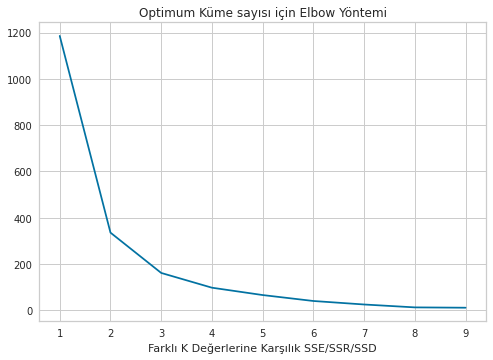

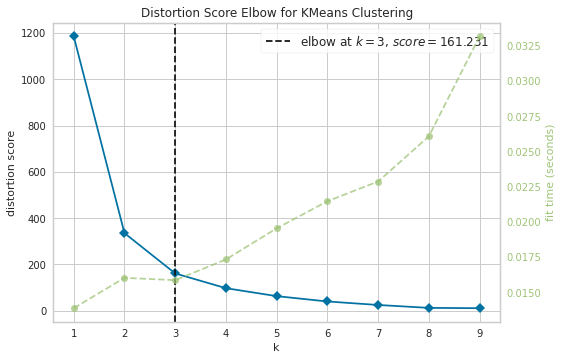

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [203]:
kmeans = KMeans()
ssd = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(model_df)
    ssd.append(kmeans.inertia_)
plt.savefig('my_image.png')
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(1, 10))
elbow.fit(model_df)
elbow.show()


In [204]:
elbow.elbow_value_

3

In [209]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [205]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(model_df)
model_df[0:5]


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
0,0.02,0.00,0.39,1.00,5
1,0.06,0.00,0.82,1.00,5
2,0.04,0.01,0.05,0.00,0
3,0.10,0.01,0.78,0.00,6
4,0.25,0.02,0.40,0.00,6


In [206]:
clusters_kmeans = kmeans.labels_

In [207]:
df["cluster"] = clusters_kmeans

In [208]:
df.groupby("cluster").agg(["count","mean","median"])

CustomerID                 Age              Annual Income (k$)              Spending Score (1-100)             
             count   mean median count  mean median              count  mean median                  count  mean median
cluster                                                                                                                
0               70 128.17 139.00    70 43.71  38.50                 70 72.19  73.50                     70 62.69  70.00
1               56  90.32  85.50    56 45.18  46.00                 56 56.41  55.50                     56 31.80  35.00
2               74  82.03  77.00    74 29.46  27.00                 74 52.70  54.00                     74 52.31  52.00